<a href="https://colab.research.google.com/github/mustafabozkaya/DeepLearningBootcamp2022/blob/master/Spectogram_Recognition_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img align="Left" width="100" height="100" src="https://thumbs.dreamstime.com/b/mb-initial-letter-vector-logo-icon-mb-initial-letter-vector-logo-icon-204517753.jpg">](https://github.com/mustafabozkaya)

# Spectogram Recognition with CNN

---
[<img align="Left" width="800" height="300" src="https://www.researchgate.net/publication/319081627/figure/fig1/AS:534034566004736@1504335170521/Spectrogram-of-a-speech-signal-with-breath-sound-marked-as-Breath-whose-bounds-are.png">](#)



**Colab** için kimlik doğrulama adımları:

**Drive yükleme işlemi**

**Drive da dosya konumlandırmayı yapma işlemleri**

In [1]:
from google.colab import drive
drive.mount('/content/mydrive/',force_remount=True)

Mounted at /content/mydrive/


In [2]:
#unmount drive
# drive.flush_and_unmount()

In [3]:
!pwd


/content


In [4]:
%cd /content

/content


In [5]:
!pwd

/content


In [6]:
#Copying current content to new editable directory
#!cp -r "../content/drive/MyDrive/spectrograms/" "/sample_data/"


+
# Package İnstalling and Controlling

In [7]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4898161500688280847
 xla_global_id: -1]

In [ ]:
!cat /proc/meminfo

In [9]:
!pip install -q keras
!pip install -q Pillow

In [10]:
import tensorflow as tf
tf.test.gpu_device_name()


''

In [11]:
tf.__version__

'2.8.2'

In [12]:
#https://github.com/astrada/google-drive-ocamlfuse/
# !mkdir -p drive
# !google-drive-ocamlfuse drive
# !ls

In [36]:
!ls ../content

mydrive  sample_data


In [38]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras. layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import glob
import numpy as np
import os
import shutil
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"]=(18,8)
%matplotlib inline
np.random.seed(42)

In [37]:
cv.__version__

'4.6.0'

# Configuring İmage datasets folder 

In [39]:
dataset_dir=f"/content/mydrive/My Drive/spectrograms/"


In [ ]:
for root, dirs, files in os.walk(dataset_dir, topdown=False):
    print(root)
    print(f"files type :{type(files)}")
    print(f"files lenth :{len(files)}")
    #print(os.path.join(root, name))
    print(f"DİR type :{type(dirs)}")
    print(f"DİR lenth :{len(dirs)}")
    
    

In [ ]:
for root,dirname, filenames in os.walk(dataset_dir):
    for filename in (filenames):
        print(os.path.join(root, filename))
        break
    

In [18]:
!ls

mydrive  sample_data


# Data Exploration

In [20]:

class_name="1" # set to class name

train_files = glob.glob(str(os.path.join(dataset_dir,str(class_name)))+'/*')

print(*train_files)
print(f"1 spectogram img lenth :{len(train_files)}")
train_imgs = [img_to_array(load_img(img)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = np.array([fn.split('/')[5].split(".")[0].strip() for fn in train_files]) # target , y label

print('Train dataset shape:', train_imgs.shape)
print('Train labels shape:', train_labels.shape)

/content/mydrive/My Drive/spectrograms/1/100648-1-2-0.png /content/mydrive/My Drive/spectrograms/1/100648-1-1-0.png /content/mydrive/My Drive/spectrograms/1/100648-1-0-0.png /content/mydrive/My Drive/spectrograms/1/100648-1-3-0.png /content/mydrive/My Drive/spectrograms/1/100648-1-4-0.png /content/mydrive/My Drive/spectrograms/1/107090-1-1-0.png /content/mydrive/My Drive/spectrograms/1/107090-1-0-0.png /content/mydrive/My Drive/spectrograms/1/117536-1-0-0.png /content/mydrive/My Drive/spectrograms/1/118070-1-0-0.png /content/mydrive/My Drive/spectrograms/1/118496-1-0-0.png /content/mydrive/My Drive/spectrograms/1/118496-1-1-0.png /content/mydrive/My Drive/spectrograms/1/121299-1-0-0.png /content/mydrive/My Drive/spectrograms/1/125520-1-4-0.png /content/mydrive/My Drive/spectrograms/1/125520-1-1-0.png /content/mydrive/My Drive/spectrograms/1/125520-1-3-0.png /content/mydrive/My Drive/spectrograms/1/125520-1-0-0.png /content/mydrive/My Drive/spectrograms/1/125520-1-2-0.png /content/mydri

In [ ]:
train_imgs[100]

In [46]:
train_labels[100]

'1'

In [19]:
# create image datasets 

In [27]:
image_size=(374,500)
batch_size=32 # paketler

#Setting train/test split
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    
    directory=dataset_dir,
    labels="inferred",
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dataset_dir,
    labels="inferred",
    validation_split=0.2,
    subset="validation",
    seed=1007,
    image_size=image_size,
    batch_size=batch_size,
)
#Checking images and labels shapes (amount of images, height, width, color channels)
for image_batch, labels_batch in test_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 374, 500, 3)
(32,)


In [24]:
train_ds.class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [58]:
print(type(train_ds))

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


In [60]:
for i in train_ds.take(5):
  print(i[0].shape)

(32, 374, 500, 3)
(32, 374, 500, 3)
(32, 374, 500, 3)
(32, 374, 500, 3)
(32, 374, 500, 3)


In [25]:
#Checking images and labels shapes (amount of images, height, width, color channels)
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 374, 500, 3)
(32,)


# Data Visualizaiton

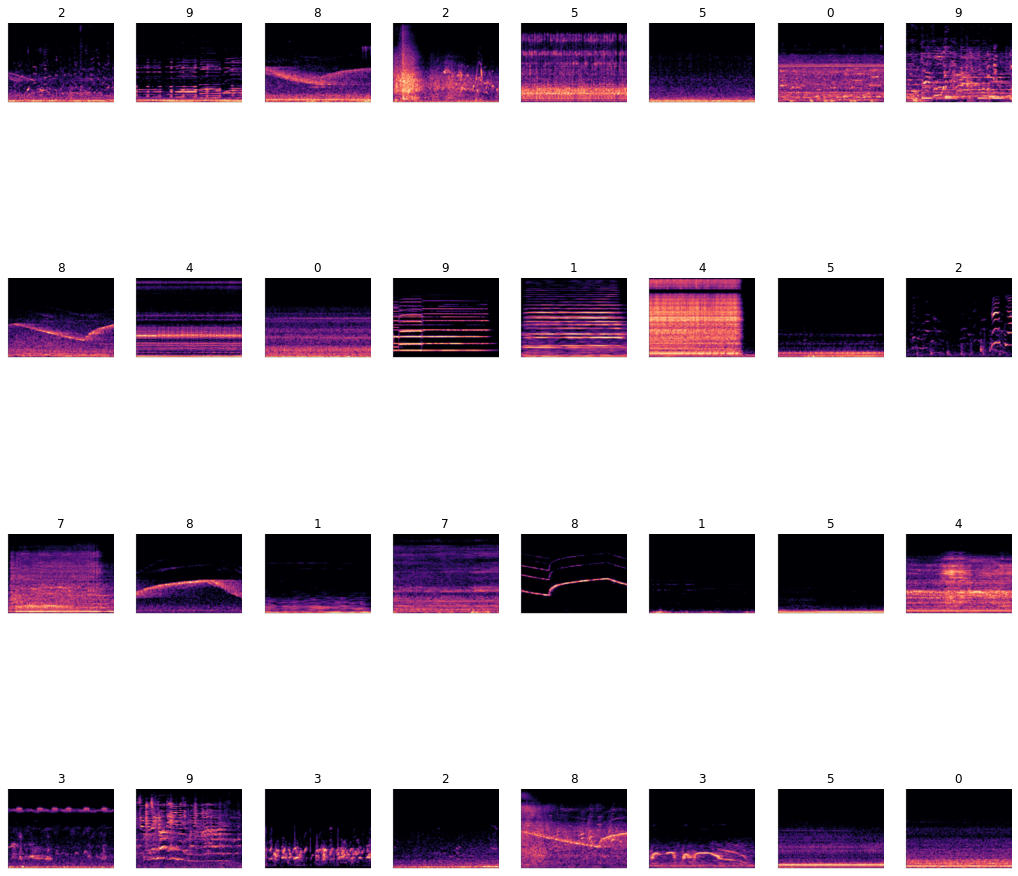

In [66]:
#Displaying image samples 
plt.figure(figsize=(18, 18))
for images, labels in train_ds.take(1):
    for i in range(batch_size):
        ax = plt.subplot(4,8,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

# Data Preparation

In [67]:
import os, sys, stat
#Defining parameters for the loader:
batch_size = 32
img_height = image_size[0]
img_width = image_size[1]

#Filtering out corrupted images
num_skipped = 0
for folder_name in (train_labels):
    folder_path = os.path.join(dataset_dir, folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()
        if not is_jfif:
            num_skipped += 1
            corrupted_dist="../content/sample_data/corrupted_img/"
            if not os.path.exists(corrupted_dist):
             os.mkdir(corrupted_dist)

            shutil.copy(fpath,corrupted_dist)
            # Delete corrupted image
            # os.chmod(fpath,stat.S_IXUSR)
            # os.remove(fpath)
            
print("Deleted %d images" % num_skipped)


Deleted 184041 images


In [71]:
#Data augmentation
data_augmentation = keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1)])




In [ ]:
#Checking images and labels shapes (amount of images, height, width, color channels)
for image_batch, labels_batch in ds_test:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

In [ ]:
#Displaying a random augmented image sample
plt.figure(figsize=(10, 10))
for images, _ in ds_test.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

# Modelling

In [ ]:
#Checking if the data format i.e the RGB channel is coming first or last so, whatever it may be, model will check first and then input shape will be feeded accordingly.
from keras import backend as K
if K.image_data_format() == "channels_first":
    input_shape = (3, img_height, img_width)
else:
    input_shape = (img_height, img_width, 3)

#Creating a model
model_dl = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(input_shape)),
  layers.Conv2D(16, 3, padding="same", activation="relu"),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding="same", activation="relu"),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding="same", activation="relu"),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation="relu"),
  layers.Dense(Dense(10, activation='softmax'))
])

In [35]:
def conv_net(X_train, y_train): 

    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Conv2D(96, kernel_size = (3,3), input_shape = (255, 5,1), strides = (4,4), activation = 'relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (3,3),strides = (2,2))) 
    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1) ,activation='relu', padding="same")) 
    model.add(tf.keras.layers.BatchNormalization()) 
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2))) 
    model.add(tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")) 
    model.add(tf.keras.layers.BatchNormalization()) 
    model.add(tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")) 
    model.add(tf.keras.layers.BatchNormalization()) 
    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")) 
    model.add(tf.keras.layers.BatchNormalization()) 
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2))) 
    model.add(tf.keras.layers.Flatten()) 
    model.add(tf.keras.layers.Dense(4096, activation='relu')) 
    model.add(tf.keras.layers.Dropout(0.5)) 
    model.add(tf.keras.layers.Dense(4096, activation='relu')) 
    model.add(tf.keras.layers.Dropout(0.5)) 
    model.add(tf.keras.layers.Dense(10, activation='softmax')) 
    
    return model

Modell Görselleştirme


In [ ]:
model_dl.summary()


In [ ]:

model_dl.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.Adadelta(),
             metrics = ['accuracy'])

### 

In [ ]:
model_dl.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

In [ ]:
model_dl.save('save_models/spectogram_model.h5')

In [ ]:
score = model_dl.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])


**Rastgele değer için test işlemi**

In [ ]:
model_test = model_dl.save('save_models/spectogram_model.h5')

In [ ]:
test_image = x_test[32]
y_test[32]

In [ ]:
plt.imshow(test_image.reshape(28,28))

In [ ]:
test_data = x_test[32].reshape(1,28,28,1)
pre=model_test.predict(test_data, batch_size=1)

# Model Deployment